# Extracting EEG data using Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat

### Load time information

In [2]:
dictionary = []

file = "SubjectMichelle__log.txt"
with open(file, 'r') as f:
    for line in f:
        dictionary.append(eval(line))
dictionary = dictionary[1:]

In [3]:
start_left_time = []
end_left_time = []
start_right_time = []
end_right_time = []


for line in dictionary:
    start_left_time.append(line['start_left_time'])
    end_left_time.append(line['end_left_time'])
    start_right_time.append(line['start_right_time'])
    end_right_time.append(line['end_right_time'])

## Extract EEG Data

In [4]:
data = pd.read_csv("SubjectMichelle__eeg.csv")
for i in range(len(start_left_time)):
    start = start_left_time[i]
    end = end_left_time[i]
    #print(start - end)
#oz = np.zeros(len(start_left_time), )


In [8]:
FS = 500
T = 15

OzLeft = np.zeros((len(start_left_time), FS * T - 10))
index = 0

for start,stop in zip(start_left_time, end_left_time):
    ozData = data[(data['time'] > start) & (data['time'] < stop)].Oz
    #print(len(ozData))   Figured out (-10) using this
    OzLeft[index, :] = ozData[0 : FS * T - 10]
    index += 1

OzRight = np.zeros((len(start_left_time), FS * T - 10))
index = 0    

for start,stop in zip(start_right_time, end_right_time):
    ozData = data[(data['time'] > start) & (data['time'] < stop)].Oz
    OzRight[index, :] = ozData[0 : FS * T - 10]
    index += 1

In [9]:
numberOfLogs = len(start_left_time)

avgOverAllLogsLeft = np.array(500)
avgOverAllLogsRight = np.array(500)

for i in range(numberOfLogs):
    avgOverAllLogsLeft = avgOverAllLogsLeft + averageOf15Times(OzLeft[i])
    avgOverAllLogsRight = avgOverAllLogsRight + averageOf15Times(OzRight[i])

# Avergae out the array over number of Logs
avgOverAllLogsLeft = avgOverAllLogsLeft / numberOfLogs
avgOverAllLogsRight = avgOverAllLogsRight / numberOfLogs

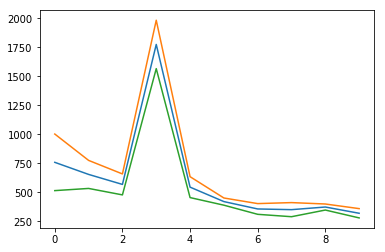

In [16]:
plotStdDevGraph(OzLeft)

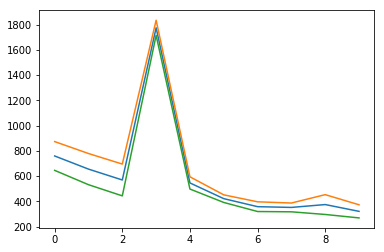

In [17]:
plotStdDevGraph(OzRight)

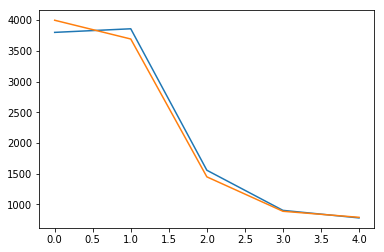

In [15]:
fig1 = plt.figure(3)
plt.plot(avgOverAllLogsLeft[10:15])
plt.plot(avgOverAllLogsRight[10:15])

# All the methods

In [6]:
def averageOf15Times(npValues):
    avg = np.array(500)
    for i in range(15):  # 15 because 15 sec of data
        if(i == 14):
            x = np.fft.fft(npValues[i * 500:i * 500 + 490])
            for j in range(10):
                x = np.append(x , 0)
            avg = avg + np.abs(x)                               # adding 10 zeros at the end, wont need data of these higher freq anyways
        else:
            x = np.fft.fft(npValues[i * 500:i * 500 + 500])
            avg = avg + np.abs(x)
    avg = avg / 15
    
    # Commented this out as now we are plotting one average figure of all Logs instead of seperate plot for each Log
    
    #fig1 = plt.figure(3)
    #plt.plot(avg[10:15])
    
    return avg

In [7]:
def calculateStdDev(OzLeft):
    OzLeftFreq = np.zeros((len(start_left_time), 30))
    numberOfLogs = len(start_left_time)

    for i in range(numberOfLogs):
        OzLeftFreq[i] = averageOf15Times(OzLeft[i])[0:30]

    leftEachFreqPower = OzLeftFreq.transpose()
    leftStdDev = np.zeros(30)

    for i in range(30):
        leftStdDev[i] = stat.stdev(leftEachFreqPower[i])
        
    return leftStdDev

In [15]:
def plotStdDevGraph(OzLeft):
    leftStdDev = calculateStdDev(OzLeft)
    leftUpper = np.zeros(30)
    leftLower = np.zeros(30)

    for i in range(30):
        leftUpper[i] = avgOverAllLogsLeft[i] + leftStdDev[i]
        leftLower[i] = avgOverAllLogsLeft[i] - leftStdDev[i]

    fig1 = plt.figure()
    plt.plot(avgOverAllLogsLeft[10:20])
    plt.plot(leftUpper[10:20])
    plt.plot(leftLower[10:20])